# Приоритизация гипотез, запуск A/B-тест и анализ результатов.


Цель проекта:
* На основе подготовленного списка гипотез по увеличению выручки, нужно приоритизировать гипотезы. Запуск A/B-тест и анализ результатов

---

Задачи:
* Подготовка данных к анализу
* Приоритизация гипотез
* Построение и интерпретация графиков
* Анализ результатов A/B-теста
* Вывод по результатам теста

---
**Описание данных**

Данные предоставлены в csv-файле.

Данные с гипотезами:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение * Efforts, тем дороже проверка гипотезы.

Данные с результатами A/B-теста:
* Данные с информацией по заказам:
    * transactionId — идентификатор заказа;
    * visitorId — идентификатор пользователя, совершившего заказ;
    * date — дата, когда был совершён заказ;
    * revenue — выручка заказа;
    * group — группа A/B-теста, в которую попал заказ.
* Данные с информацией о пользователях:
    * date — дата;
    * group — группа A/B-теста;
    * visitors — количество пользователей в указанную дату в указанной группе A/B-теста

1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Приоритизация гипотез](#priority)
3. [Модели прогнозирования оттока клиентов](#model)
4. [Анализ A/B-теста](#abanalisys)
5. [Вывод](#conclusion)

<a id='start'></a>
### Шаг 1.Изучение файлов с данными и общей информацией по ним

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings

In [2]:
path = ('/Users/valeriyaniskorodova/Y.Praktikum/Module 2/Sprint 3/')
#hypothesis = ('/datasets/')

In [3]:
hypothesis = pd.read_csv(path + "hypothesis.csv")

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
# название всех столбцов привожу к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
orders = pd.read_csv(path + 'orders.csv')

In [7]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
visitors = pd.read_csv(path+'visitors.csv')

In [9]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<a id='preprocessing'></a>
### Шаг 2. Предобработка данных

In [10]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В данной таблице нет проблем с типами данных, пропусками, поэтому перейду к следующим таблицам.

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Все столбцы, в которых есть информация об id нужно привести к типу str, чтобы при анализе данных не произошло математических операций с данными столбцами. Столбец с датой приводим к типу datetime.

In [12]:
dict_id = {
    "transactionId":'str',
    "visitorId":'str',
    "date":'datetime64'
}
orders = orders.astype(dict_id)

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   object        
 1   visitorId      1197 non-null   object        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


Теперь все хорошо. Проверю таблицу на наличие дубликатов

In [14]:
orders.duplicated().sum()

0

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors['date'] = visitors['date'].astype('datetime64')

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
visitors.duplicated().sum()

0

<a id='priority'></a>
### Шаг 3. Приоритизация гипотез

На данном шаге применю фреймворки ICE и RICE для приоритизации гипотез и посмотрю, как они отличаются между собой.

In [19]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).\
map(lambda x: '{:.1f}'.format(x))

In [20]:
hypothesis['ICE'] = hypothesis['ICE'].astype('float')

In [21]:
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending =False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


Наиболее перспективные гипотезы после применения фрейворка ICE: 8,0,7.

In [22]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']\
/hypothesis['efforts']

In [23]:
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [24]:
hypothesis.reset_index(inplace=True)
hypothesis.rename(columns={'index':'number_of_hypothesis'}, inplace=True)

In [25]:
hypothesis[['hypothesis','RICE','ICE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hypothesis  9 non-null      object 
 1   RICE        9 non-null      float64
 2   ICE         9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 344.0+ bytes


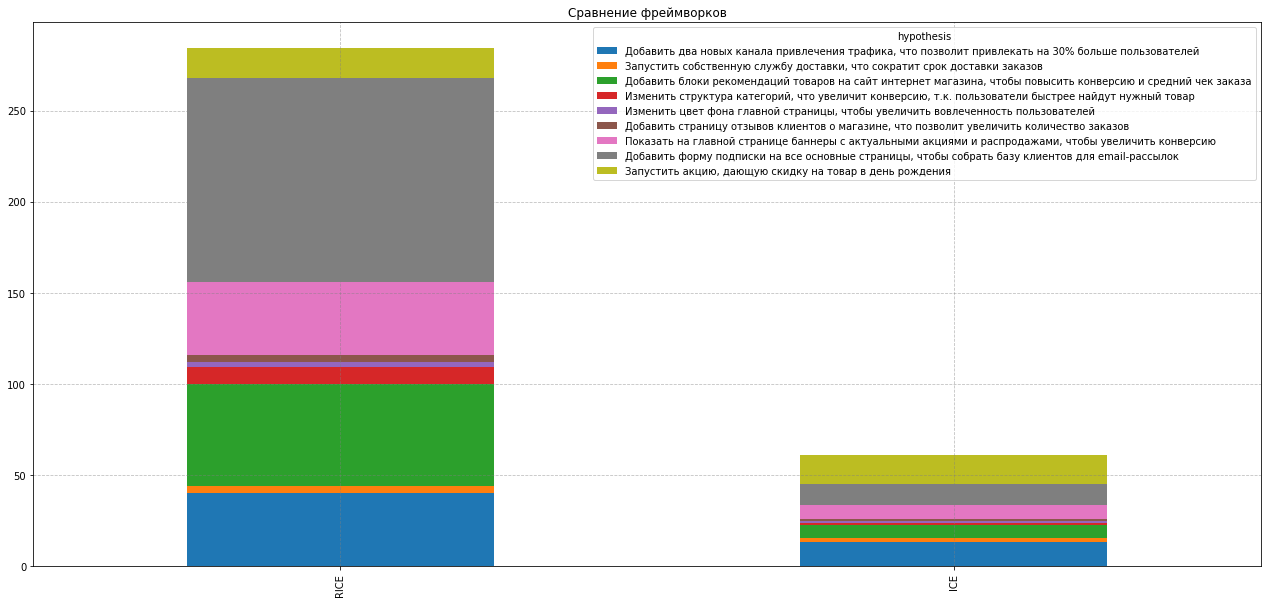

In [26]:

ax = hypothesis[['hypothesis','RICE','ICE']].set_index('hypothesis').T.\
plot(kind='bar', stacked=True, figsize=(22,10), title='Сравнение фреймворков')
ax.grid(True, linestyle='--', color='grey', which='major', alpha=.5)


Видно, что отличие перспективных гипотез после применения фреймворков только в одной гипотезе, также в их расположении. 7 гипотеза находится на первом месте, потому что reach равен 10, в то время, как у второй и нулевой 2, 3 соответственно. Соответственно 7 гипотеза затронет большинство количества пользователей. Нулевая гипотеза имеет высокий impact, это значит, что она повлияет на пользователей больше, чем остальные, но при этом, у 7 гипотезы оценка 7, что значит, что она тоже будет иметь приличный вес. В ICE мы не учитываем количество пользователей, которое затронет изменение, поэтому 7 гипотеза занимает последнее место.В то время как 8 гипотеза имеет высокую оценку параметров impact и confidence, что означает, что данная гипотеза сильно повлияет на пользователей, их опыт и удовлетворенность от продукта, а также мы достаточно уверены в том, что эти изменения на пользователей повлияет именно так.

Можно сделать вывод:
* Выбор гипотез будет зависеть от того, какой конечный результат мы преследуем. Если для нас важно, чтобы изменение затронуло большее количество наших пользователей, и мы можем достаточно точно оценить охват, то надо опираться на перспективные гипотезы, полученные после применения фреймворка RICE. В том случае, когда мы больше заинтересованы в удовлетворенности пользователя от изменения и в том, что мы имеем высокую оценку уверенности в том, что они изменения повлияют на пользователей так , а не иначе, то опираемся на результаты фреймворка ICE.


<a id ='abanalisys'></a>
### Шаг 4. Анализ A/B-теста

In [27]:
datesGroup = orders[['date', 'group']].drop_duplicates()

In [28]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [29]:
# агрегированные кумулятивные по дням данные о заказах
ordersAggregared = datesGroup.apply(lambda x:\
                                    orders[np.logical_and(orders['date'] <= x['date'],\
                                                         orders['group'] == x['group'])].\
                                   agg({'date':'max',
                                       'group':'max',
                                        'transactionId': pd.Series.nunique,
                                        'visitorId':pd.Series.nunique,
                                       'revenue':'sum'}), axis=1).\
sort_values(by=['date', 'group'])


In [30]:
ordersAggregared.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [31]:
# агрегированные кумулятивные по дням данные о посетителях
visitorsAggregared = datesGroup.apply(lambda x :\
                                     visitors[np.logical_and(visitors['date'] <= x['date'],
                                                            visitors['group'] == x['group'])].\
                                             agg({'date':'max',
                                                 'group':'max',
                                                 'visitors': 'sum'}), axis=1).\
sort_values(by=['date','group'])

In [32]:
visitorsAggregared.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [33]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregared.merge(visitorsAggregared, left_on = ['date', 'group'],\
                                       right_on = ['date', 'group'])
cumulativeData.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [34]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [35]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

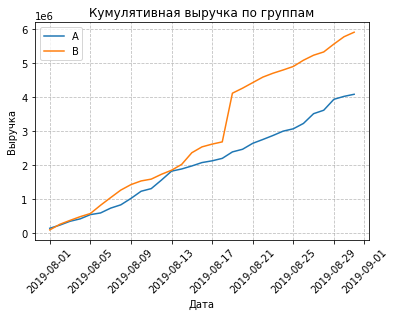

In [36]:
# график кумулятивной выручки по группам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True, linestyle='--', color='grey', alpha=.5, which='major')
plt.legend()
plt.show()

В то время, как у группы В выручка равномерно увеличивалась в течении всего теста, у группы А был резкий скачок в середине меся, после кооторого выручка опять стабильно увеличивалась, но на более высоком уровне.

Такое поведение графика может говорит о появлении дорогих заказов в выборке, или о выбросах.

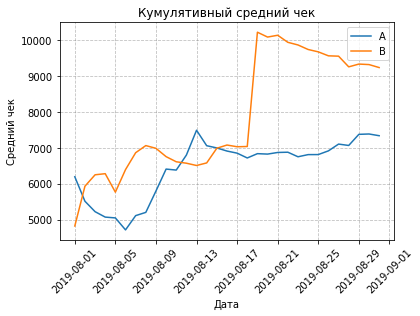

In [37]:
plt.plot(cumulativeRevenueA['date'],\
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = "A")
plt.plot(cumulativeRevenueB['date'],\
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = "B")
plt.grid(True, linestyle='--', color='grey', which='major', alpha=.5)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек')
plt.legend()
plt.show()

 Средний чек у группы А становится равномерным во второй половине теста. В то время, как у группы В, средний чек имел скачок примерно в том же самом месте, где был скачок у выручки. Думаю, что тут тесту нужно больше времени, чтобы прийти к стабильному равномерному среднему чеку, так как скорее всего в этот период попали дорогие заказы.

In [38]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',\
                                                  right_on='date', how='left',
                                                  suffixes=['A','B'])

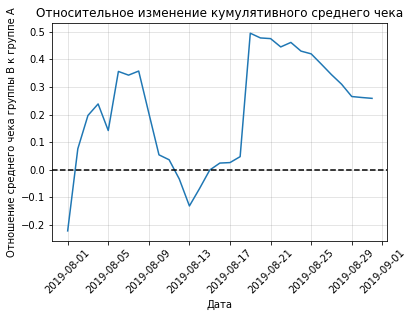

In [39]:
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.title('Относительное изменение кумулятивного среднего чека')
plt.grid(True, color='grey', which='major', alpha=.25)
plt.show()

В нескольких точках график различия между средним чеком по группам резко возрастает, что говорит о наличии дорогих заказов и выбросов.


In [40]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [41]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

In [42]:
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

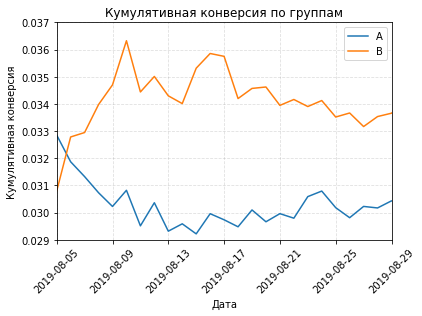

In [43]:
# График кумулятивн
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid(True, linestyle='--', color='grey', which='major', alpha=.25 )
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('Кумулятивная конверсия по группам')
plt.axis(['2019-08-05', '2019-08-29', 0.029, 0.037])
plt.show()

График получился почти симметричный. У группы В заметны более явные "скачки", видно что конверсия становится более стабильной у группы В к концу периода. Конверсия группы В под конец теста остается больше, чем конверсия группы А.

In [44]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].\
merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [45]:
mergedCumulativeConversions

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793
5,2019-08-06,0.031870,0.032783
6,2019-08-07,0.031324,0.032946
7,2019-08-08,0.030731,0.033975
8,2019-08-09,0.030225,0.034699
9,2019-08-10,0.030821,0.036323


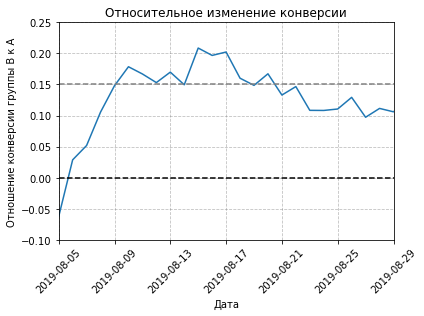

In [75]:
plt.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB'] /\
         mergedCumulativeConversions['conversionA']) - 1)
plt.xticks(rotation=45)
plt.axis(['2019-08-05','2019-08-29', -0.10, 0.25])
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение конверсии')
plt.xlabel('Дата')
plt.ylabel('Отношение конверсии группы В к А')
plt.grid(True, linestyle='--', color='grey', alpha=.5)

В начале теста группа В имела конверсию ниже группы А, но к середине теста вырвалась вперед, потом снова немного упала. Но, при этом относительная конверсия больше не находилась на отрицательном значении, что говорит о том, что конверсия группы В сохраняла стабильные лушие показатели в течении теста.



In [47]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [48]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).\
groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns = ['visitorId', 'orders']

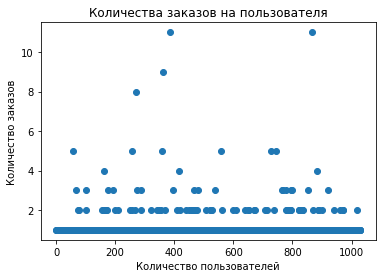

In [49]:
x_value = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.scatter(x_value, ordersByUsers['orders'])
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Количества заказов на пользователя')
plt.show()

Видно, что пользователей, которые делают от 2 до 5 заказов много. Определю границу аномальных пользователей, чтобы понять, считать ли эти значения аномальными.

In [50]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей оформляли больше, чем 2 заказа. И 10% пользователей оформляли больше 1 заказа.

Возьму 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсею аномальные значения по ней.

Text(0.5, 1.0, 'Стоимость заказа пользователя')

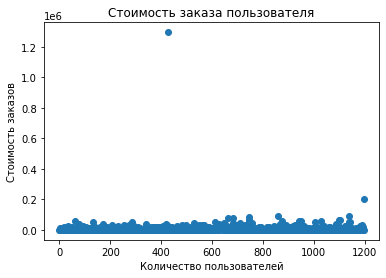

In [51]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.title('Стоимость заказа пользователя')

Есть довольно дорогие заказы, их мало, но скорее всего именно они влияли на скачки в кумумлятивных графиках. Также определю границу аномальных значений для стоимости.


In [52]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не больше 5% заказов имееют стоимость выше 28 000 рублей, и не больше 1% дороже 58 233 рублей.

Возьму за нижнюю границу заказы до 28 000 рублей.

---

Теперь найду статистическую значимость различий в конверсии, среднем чеке по "Сырым" и "очищенным" данным

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.

In [53]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [54]:
# Срез по таблице по группе А и В с сохранением столбцов date и visitors
visitorsADaily  = visitors[visitors['group'] == "A"][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Создаю таблицу с кумулятивными данными
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date']\
                                                                    <= x['date']].\
                                           agg({'date':'max',
                                               'visitorsPerDateA':'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date']\
                                                                    <= x['date']].\
                                           agg({'date':'max',
                                               'visitorsPerDateB':'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [55]:


ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId',\
                                               'visitorId', 'revenue']].\
groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique,
                                     'revenue':'sum'})
ordersADaily.columns=['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = orders[orders['group'] =='B'][['date', 'transactionId',\
                                               'visitorId', 'revenue']].\
groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique,
                                    'revenue':'sum'})
ordersBDaily.columns =['date', 'ordersPerDateB', 'revenuePerDateB']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <=\
                                                              x['date']].\
                                        
                                        agg({'date':'max',
                                            'ordersPerDateA':'sum',
                                             'revenuePerDateA':'sum'}), axis=1)\
.sort_values(by='date')
ordersACummulative.columns =['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <=\
                                                              x['date']].\
                                       agg({'date':'max',
                                           'ordersPerDateB':"sum",
                                           'revenuePerDateB':'sum'}), axis=1).\
sort_values(by='date')
ordersBCummulative.columns=['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left').\
merge(ordersACummulative, left_on='date', right_on='date', how='left').\
merge(ordersBCummulative, left_on='date', right_on='date', how='left').\
merge(visitorsADaily,left_on='date', right_on='date', how='left').\
merge(visitorsBDaily,left_on='date', right_on='date', how='left').\
merge(visitorsBCummulative, left_on='date', right_on='date', how='left').\
merge(visitorsACummulative, left_on='date', right_on='date', how='left')


In [56]:
#Таблицы для групп, в которых пользователи делали заказ хотя бы 1 раз
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).\
agg({'transactionId':pd.Series.nunique})
ordersByUsersA.columns=['visitorId', 'orders']

ordersByUsersB = orders[orders['group'] == "B"].groupby('visitorId', as_index=False).\
agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']


In [57]:
# Таблицы с количеством заказов,в том числе 0
sampleA = pd.concat([ordersByUsersA['orders'], 
                     pd.Series(0, index= np.arange(data['visitorsPerDateA'].sum()-\
                                                  len(ordersByUsersA['orders'])),\
                               name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()-\
                                                len(ordersByUsersB['orders'])),\
                             name='orders')], axis=0)

In [58]:
'p-value = {0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1])

'p-value = 0.467'

p-value больше 0.05, значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем.

In [59]:
'Относительный прирост конверсии группы В  = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1)

'Относительный прирост конверсии группы В  = -0.005'

Видно, что относительный проигрыш группы В равен 0.5 процентов. 



---

Посчитаю статистическую значимость различий в среднем чеке.

In [60]:
'p-value = {0:.3f}'.format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],\
                                 orders[orders['group'] == 'B']['revenue'])[1])

'p-value = 0.365'

p-value больше 0.05, значит нулевую гипотезу я не отвергаю, и нет причин считать, что в среднем чеке есть различия.

In [61]:
' {0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/
                                 orders[orders['group'] == 'A']['revenue'].mean() - 1)

' 0.259'

Но средний чек группы В значительно больше среднего чека группы А, на 25,9%

Теперь уберу аномальные значения из данных, и найду статистическую значимость в уже "очищенных" данных.

In [72]:
warnings.filterwarnings('ignore')

In [73]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],\
                                ordersByUsersA[ordersByUsersB['orders']>2]['visitorId']], \
                               axis=0)
usersExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
anomalUsers = pd.concat([usersWithManyOrders,usersExpensiveOrders], axis =0).drop_duplicates().\
sort_values()
anomalUsers

1103    1164614297
137     1211585711
31      1230306981
1136    1307669133
858     1316129916
           ...    
744      888512513
489      910107897
563      935349363
709      950626008
501      996668426
Name: visitorId, Length: 78, dtype: object

In [63]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].\
                                                          isin(anomalUsers))]['orders'],\
                                           pd.Series(0, index=np.arange(data['visitorsPerDateA'].\
                                                                 sum() - \
                                                                 len(ordersByUsersA['orders'])),\
                                                    name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].\
                                                          isin(anomalUsers))]['orders'],\
                                                           pd.Series(0, index=np.arange(data['visitorsPerDateB'].\
                                                                                       sum()-\
                                                                                       len(ordersByUsersB['orders'])),\
                                                                    name='orders')], axis=0)

In [64]:
'p-value = {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'p-value = 0.002'

p-value меньше 0.05, значит, что отвергаем нулевую гипотезу. После удаления аномальных значений, то есть различия между конверсией стали статистически значимыми.

In [65]:
'{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() -1)

'0.229'

При это изменилась разница между средней конверсией между группами, и группа В стала в выигрыше по отношению к группе А.

In [66]:
meanrevenueA = orders[np.logical_and(orders['group'] == "A",\
                                     np.logical_not(orders['visitorId'].\
                                                    isin(anomalUsers)))]['revenue']
                      

In [67]:
meanrevenueB = orders[np.logical_and(orders['group'] == "B",\
                     np.logical_not(orders['visitorId'].\
                                    isin(anomalUsers)))]['revenue']

In [68]:
'p-value = {0:.3f}'.format(st.mannwhitneyu(meanrevenueA, meanrevenueB)[1])

'p-value = 0.400'

p-value  увеличилось

In [69]:
"{0:.3f}".format(meanrevenueB.mean() / meanrevenueA.mean() - 1)

'-0.013'

Но средний чек группы В теперь стал меньше А, на 1,3%

То есть, это доказывает то, что аномальные значение очень сильно влияют на значения теста.



### Шаг 5.Выводы

Была проведена предобработка данных, изменены типы данных на верные.

Была проведена приоритизация гипотез с помощью двух фреймворков и сделан вывод, что выбор гипотез будет зависеть от того, какой конечный результат мы преследуем. Если для нас важно, чтобы изменение затронуло большее количество наших пользователей, то надо опираться на перспективные гипотезы, полученные после применения фреймворка RICE. В том случае, когда мы больше заинтересованы в удовлетворенности пользователя от изменения и в том, что мы имеем высокую оценку уверенности в том, что они изменения повлияют на пользователей так, а не иначе, то опираемся на результаты фреймворка ICE.

Был проведен анализ результатов после проведения A/B- теста

Результаты, полученые после проведения A/B- теста:
* По сырым данным у нас нет статистически значимых различний между группами по конверсии и среднему чеку
* После удаления аномальных значений, различия между группами по конверсии стало статистически значимым, даже при разнице в 1,3%
* По графику различия конверсии можно увидеть, что группа В выигрывает у группы А значительно, несмотря на то, что под конец значение конверсии стало ниже
* По графику средний чек колебался, по нему было сложно сделать вывод
* После удаления аномальных значений, средний чек группы В стал меньше среднего чека группы А

Вывод по тесту: средний чек еще не установился, но, все же, группа В выигрышнее. Тест стоит приостановить и признать его успешным, по конверсии есть статистически значимые различия между группами, совсем отрицать влиняние дорогих покупок не стоит, так как вполне возможно они появились благодаря новому нововведению.
